March 20, 2025

Downloaded humidity and wind data over this period of time for LVK from the [National Weather Service](https://www.weather.gov/wrh/timeseries?site=klvk).

In [1]:
import numpy as np
import pandas as pd
# from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from horemheb.paths import data_dir

#from pathlib import Path


In [3]:
humid_file = data_dir / "chart_LVK_temp_dew_humid_jan_mar_2025.csv"
wind_file = data_dir / "chart_LVK_wind_gust_dir_jan_mar_2025.csv"

dfh = pd.read_csv(humid_file)
dfw = pd.read_csv(wind_file)

In [4]:
dfh

,DateTime,Temperature,Dew Point,Relative Humidity
0,2024-12-31 16:53:00,10.6,-0.70,45.80
1,2024-12-31 17:53:00,8.3,0.51,58.32
2,2024-12-31 18:53:00,8.3,0.51,58.32
3,2024-12-31 19:53:00,7.8,1.63,65.31
4,2024-12-31 20:53:00,7.8,1.63,65.31
...,...,...,...,...
1826,2025-03-19 12:53:00,14.4,3.22,47.24
1827,2025-03-19 13:53:00,15.0,4.32,49.10
1828,2025-03-19 14:53:00,16.7,5.53,47.90
1829,2025-03-19 15:53:00,15.6,6.03,53.18


In [5]:
dfw

,DateTime,Wind Speed,Gust,Direction
0,2024-12-31 16:53:00,11,NaN,70
1,2024-12-31 17:53:00,7,NaN,70
2,2024-12-31 18:53:00,0,NaN,0
3,2024-12-31 19:53:00,6,NaN,70
4,2024-12-31 20:53:00,9,NaN,40
...,...,...,...,...
1826,2025-03-19 12:53:00,6,NaN,230
1827,2025-03-19 13:53:00,9,NaN,230
1828,2025-03-19 14:53:00,7,NaN,280
1829,2025-03-19 15:53:00,24,NaN,300


In [6]:
def calc_abs_humidity(temp_c, rel_humidity):
    """
    Calculate absolute humidity in g/m^3 from temperature and relative humidity
    
    Parameters:
        temp_c (float): Temperature in Celsius
        rel_humidity (float): Relative humidity percentage (0-100)
        
    Returns:
        float: Absolute humidity in g/m^3
    """
    # Constants
    A = 6.112  # hPa
    B = 17.67  # dimensionless
    C = 243.5  # °C
    
    # Calculate saturation vapor pressure
    exp_term = (B * temp_c) / (C + temp_c)
    es = A * np.exp(exp_term)  # Saturation vapor pressure in hPa
    
    # Calculate actual vapor pressure
    e = (rel_humidity / 100.0) * es
    
    # Calculate absolute humidity
    abs_humidity = (2.16679 * e) / (273.15 + temp_c)
    
    return abs_humidity


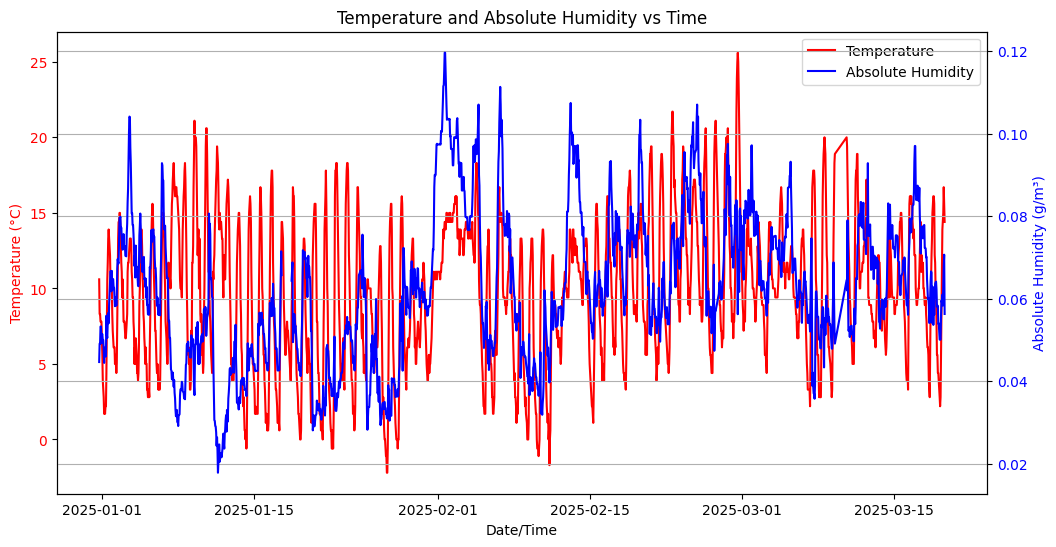

In [7]:
# Calculate absolute humidity
dfh['Absolute Humidity'] = calc_abs_humidity(dfh['Temperature'], dfh['Relative Humidity'])

# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on left axis
ax1.plot(pd.to_datetime(dfh['DateTime']), dfh['Temperature'], color='red', label='Temperature')
ax1.set_xlabel('Date/Time')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create second y-axis that shares same x-axis
ax2 = ax1.twinx()

# Plot absolute humidity on right axis
ax2.plot(pd.to_datetime(dfh['DateTime']), dfh['Absolute Humidity'], color='blue', label='Absolute Humidity')
ax2.set_ylabel('Absolute Humidity (g/m³)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Temperature and Absolute Humidity vs Time')
plt.grid(True)
plt.show()


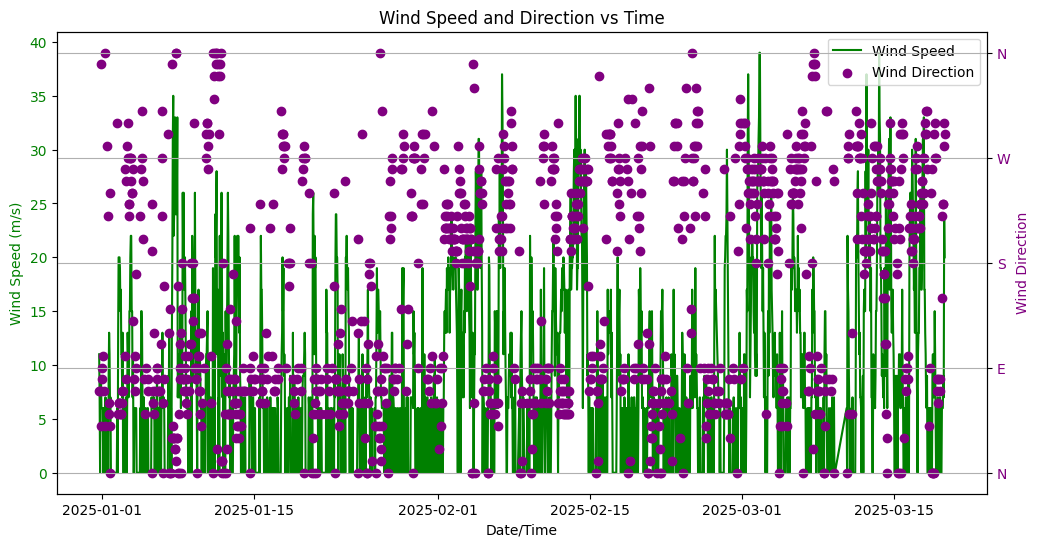

In [8]:
# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot wind velocity on left axis
ax1.plot(pd.to_datetime(dfw['DateTime']), dfw['Wind Speed'], color='green', label='Wind Speed')
ax1.set_xlabel('Date/Time')
ax1.set_ylabel('Wind Speed (m/s)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create second y-axis that shares same x-axis
ax2 = ax1.twinx()

# Plot wind direction on right axis
#ax2.plot(pd.to_datetime(dfw['DateTime']), dfw['Direction'], color='purple', label='Wind Direction')
mask = dfw['Wind Speed'] != 0 # don't plot direction when wind-speed = 0
ax2.scatter(pd.to_datetime(dfw['DateTime'][mask]), dfw['Direction'][mask], color='purple', label='Wind Direction')
ax2.set_ylabel('Wind Direction', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
# Set y-axis ticks for cardinal directions
ax2.set_yticks([0, 90, 180, 270, 360])
ax2.set_yticklabels(['N', 'E', 'S', 'W', 'N'])

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Wind Speed and Direction vs Time')
plt.grid(True)
plt.show()


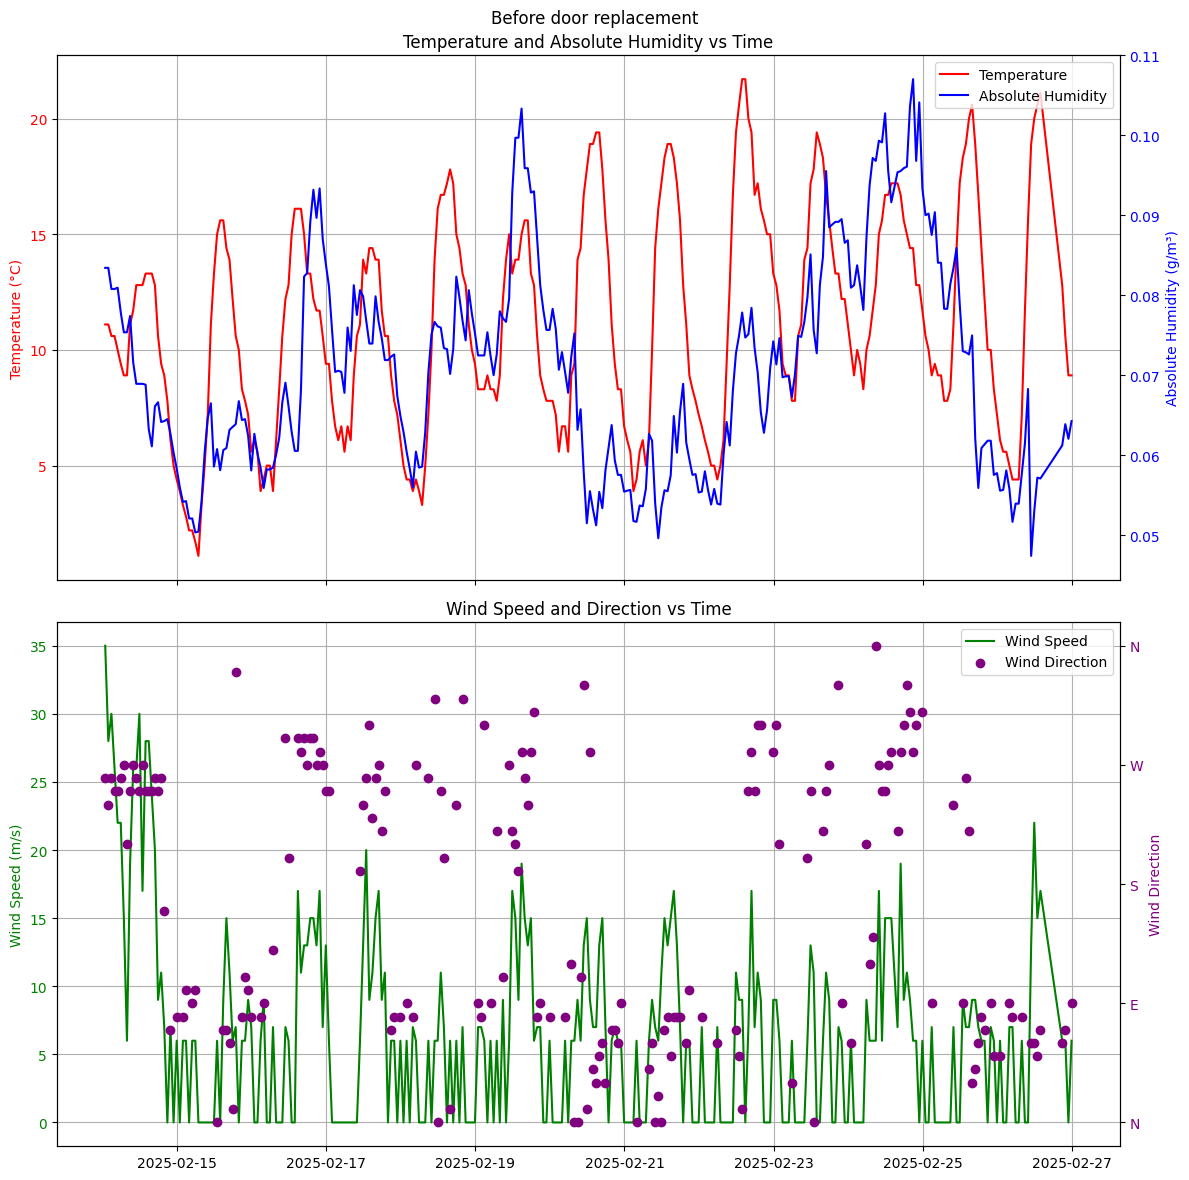

In [9]:
# Filter data for Feb 14-27
start_date = '2025-02-14'
end_date = '2025-02-27'
mask = (pd.to_datetime(dfh['DateTime']) >= start_date) & (pd.to_datetime(dfh['DateTime']) <= end_date)
dft_filtered = dfh[mask]
dfw_filtered = dfw[mask]

# Create figure with 2 subplots sharing x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Top subplot - Temperature and Humidity
temp_line = ax1.plot(pd.to_datetime(dft_filtered['DateTime']), dft_filtered['Temperature'], 
                     color='red', label='Temperature')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax1b = ax1.twinx()
humid_line = ax1b.plot(pd.to_datetime(dft_filtered['DateTime']), dft_filtered['Absolute Humidity'], 
                       color='blue', label='Absolute Humidity')
ax1b.set_ylabel('Absolute Humidity (g/m³)', color='blue')
ax1b.tick_params(axis='y', labelcolor='blue')

# Add legend to top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
ax1.set_title('Temperature and Absolute Humidity vs Time')
ax1.grid(True)

# Bottom subplot - Wind Speed and Direction
wind_line = ax2.plot(pd.to_datetime(dfw_filtered['DateTime']), dfw_filtered['Wind Speed'], 
                     color='green', label='Wind Speed')
ax2.set_ylabel('Wind Speed (m/s)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax2b = ax2.twinx()
mask = dfw_filtered['Wind Speed'] != 0 # don't plot direction when wind-speed = 0
wind_dir = ax2b.scatter(pd.to_datetime(dfw_filtered['DateTime'][mask]), dfw_filtered['Direction'][mask], 
                        color='purple', label='Wind Direction')
ax2b.set_ylabel('Wind Direction', color='purple')
ax2b.tick_params(axis='y', labelcolor='purple')
ax2b.set_yticks([0, 90, 180, 270, 360])
ax2b.set_yticklabels(['N', 'E', 'S', 'W', 'N'])

# Add legend to bottom subplot
lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax2b.get_legend_handles_labels()
ax2.legend(lines3 + lines4, labels3 + labels4, loc='upper right')
ax2.set_title('Wind Speed and Direction vs Time')
ax2.grid(True)

fig.suptitle("Before door replacement")

# Adjust layout and display
plt.tight_layout()
plt.show()


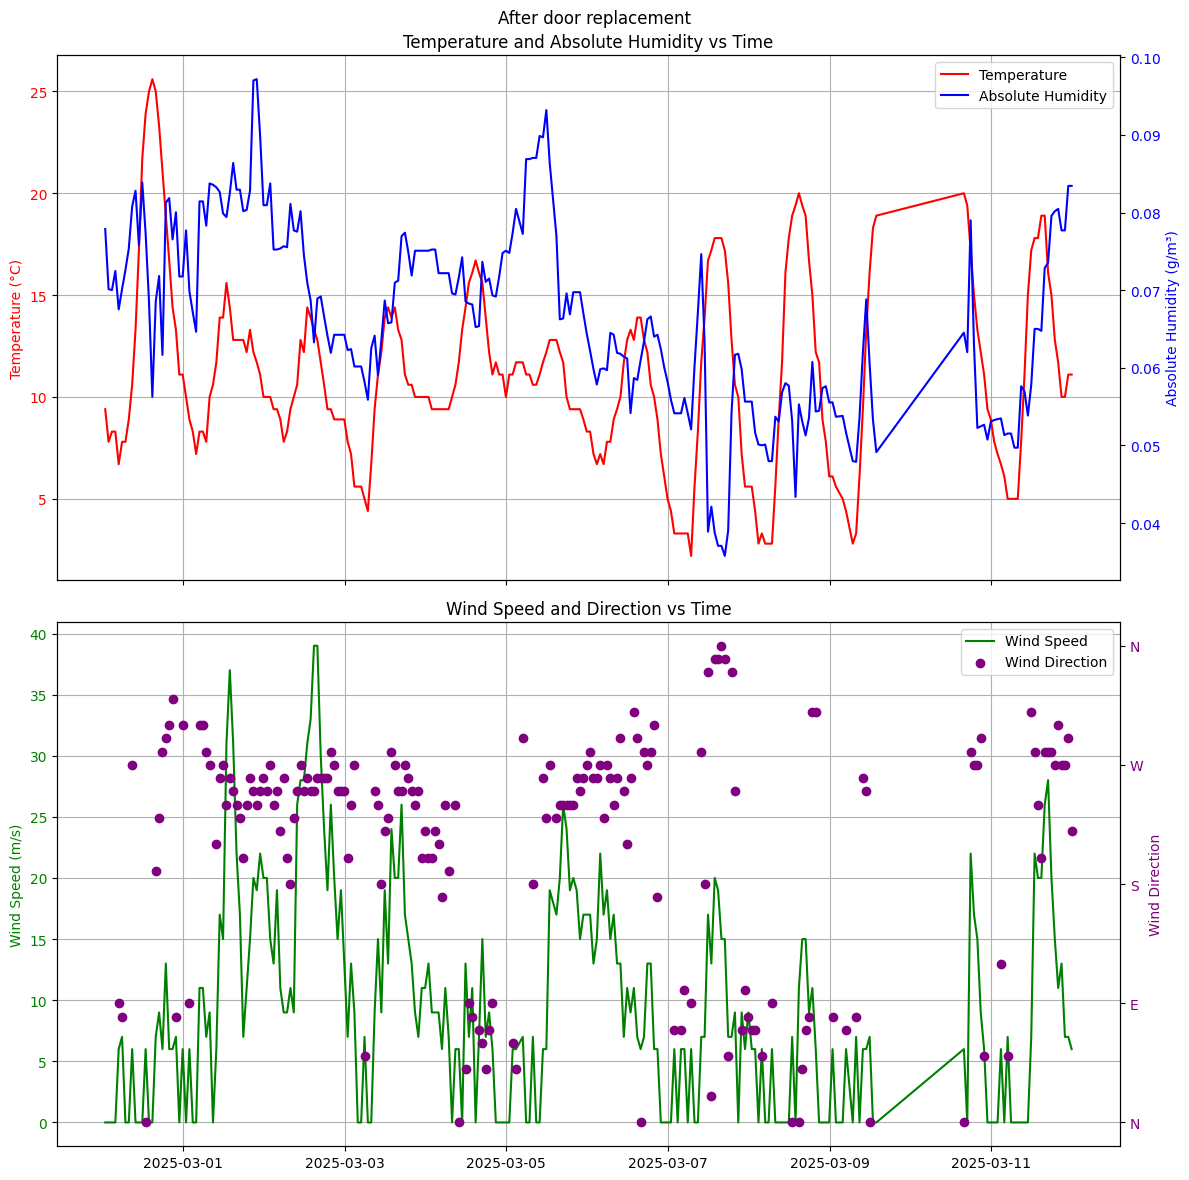

In [10]:
# Filter data for after door replacement
start_date = '2025-02-28'
end_date = '2025-03-12'
mask = (pd.to_datetime(dfh['DateTime']) >= start_date) & (pd.to_datetime(dfh['DateTime']) <= end_date)
dft_filtered = dfh[mask]
dfw_filtered = dfw[mask]

# Create figure with 2 subplots sharing x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Top subplot - Temperature and Humidity
temp_line = ax1.plot(pd.to_datetime(dft_filtered['DateTime']), dft_filtered['Temperature'], 
                     color='red', label='Temperature')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax1b = ax1.twinx()
humid_line = ax1b.plot(pd.to_datetime(dft_filtered['DateTime']), dft_filtered['Absolute Humidity'], 
                       color='blue', label='Absolute Humidity')
ax1b.set_ylabel('Absolute Humidity (g/m³)', color='blue')
ax1b.tick_params(axis='y', labelcolor='blue')

# Add legend to top subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
ax1.set_title('Temperature and Absolute Humidity vs Time')
ax1.grid(True)

# Bottom subplot - Wind Speed and Direction
wind_line = ax2.plot(pd.to_datetime(dfw_filtered['DateTime']), dfw_filtered['Wind Speed'], 
                     color='green', label='Wind Speed')
ax2.set_ylabel('Wind Speed (m/s)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax2b = ax2.twinx()
mask = dfw_filtered['Wind Speed'] != 0 # don't plot direction when wind-speed = 0
wind_dir = ax2b.scatter(pd.to_datetime(dfw_filtered['DateTime'][mask]), dfw_filtered['Direction'][mask], 
                        color='purple', label='Wind Direction')
ax2b.set_ylabel('Wind Direction', color='purple')
ax2b.tick_params(axis='y', labelcolor='purple')
ax2b.set_yticks([0, 90, 180, 270, 360])
ax2b.set_yticklabels(['N', 'E', 'S', 'W', 'N'])

# Add legend to bottom subplot
lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax2b.get_legend_handles_labels()
ax2.legend(lines3 + lines4, labels3 + labels4, loc='upper right')
ax2.set_title('Wind Speed and Direction vs Time')
ax2.grid(True)

fig.suptitle("After door replacement")

# Adjust layout and display
plt.tight_layout()
plt.show()
